In [45]:
!unzip "/content/Iris Species.zip"


Archive:  /content/Iris Species.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Iris.csv                
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [47]:
dataset=pd.read_csv("/content/Iris.csv")

In [48]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
dataset.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [52]:
dataset.drop(["Id"],axis=1,inplace=True)

In [53]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
dataset.shape

(150, 5)

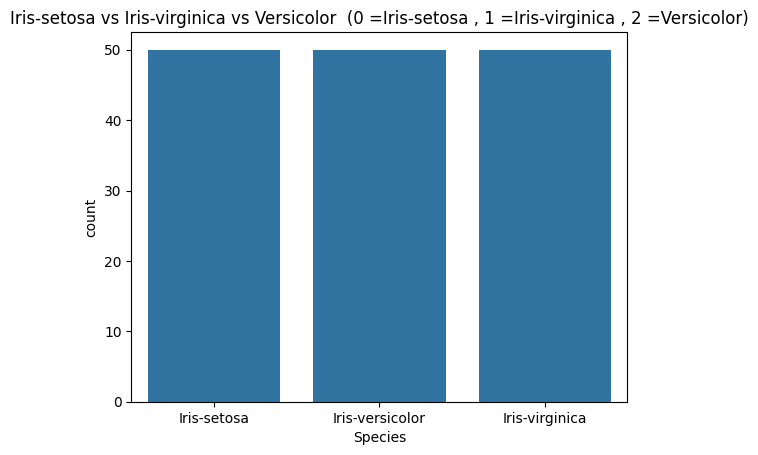

In [55]:
sns.countplot(x = 'Species', data = dataset)
plt.title('Iris-setosa vs Iris-virginica vs Versicolor  (0 =Iris-setosa , 1 =Iris-virginica , 2 =Versicolor)')
plt.show()

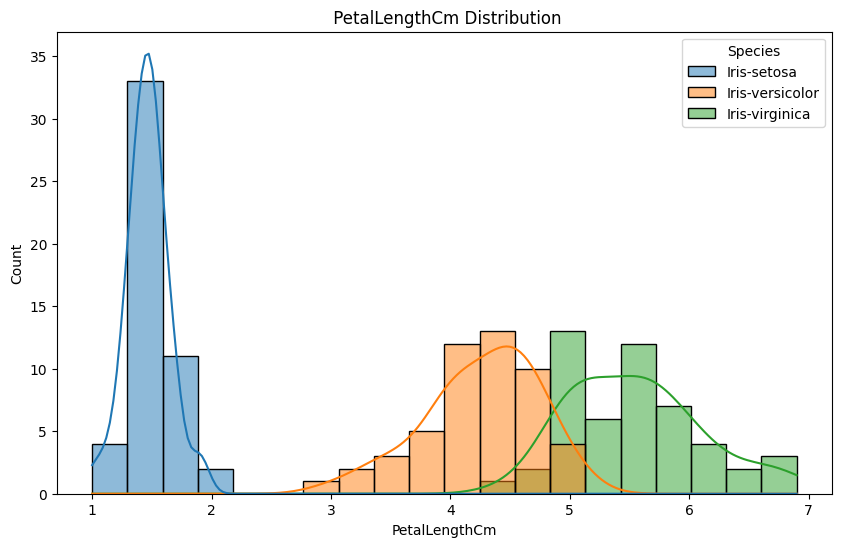

In [56]:
plt.figure(figsize = (10,6))
sns.histplot(data= dataset, x = "PetalLengthCm", hue = "Species", kde= True , bins = 20)
plt.title(' PetalLengthCm Distribution')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])


In [58]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


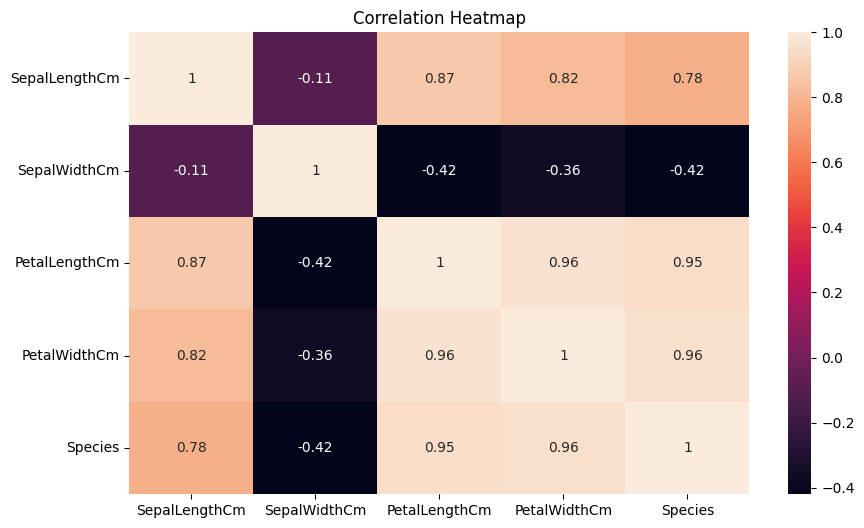

In [59]:
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot= True)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
X = dataset.drop('Species', axis = 1)
y = dataset['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


Logistic Regression


In [62]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score
y_train_pred = lr.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print('Accuracy:', accuracy_train)


Accuracy: 0.975


In [64]:
from sklearn.metrics import accuracy_score
y_test_pred = lr.predict(X_test)
accuracy_train = accuracy_score(y_test, y_test_pred)
print('Accuracy:', accuracy_train)

Accuracy: 0.9666666666666667


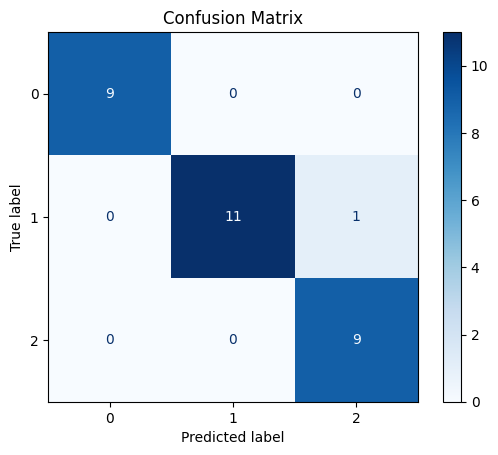

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

KNN

In [66]:
# find the best k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 20
error = []
accuracy = []
for i in range(1, k , 2):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error.append(1-metrics.accuracy_score(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

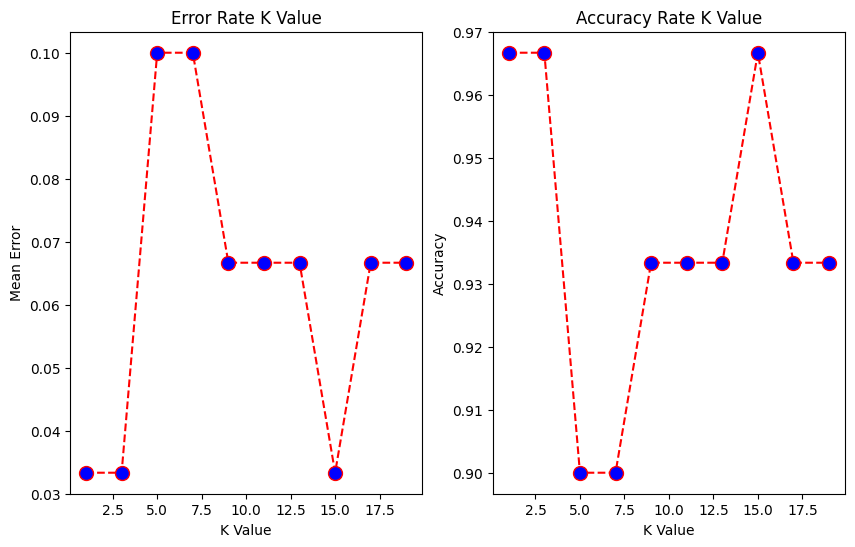

In [67]:

plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.plot(range(1,k, 2), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(range(1,k,2 ), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [69]:
y_pred = knn.predict(X_test)

In [70]:
accuracy_ofmodel = metrics.accuracy_score(y_test, y_pred)
accuracy_ofmodel



0.9666666666666667

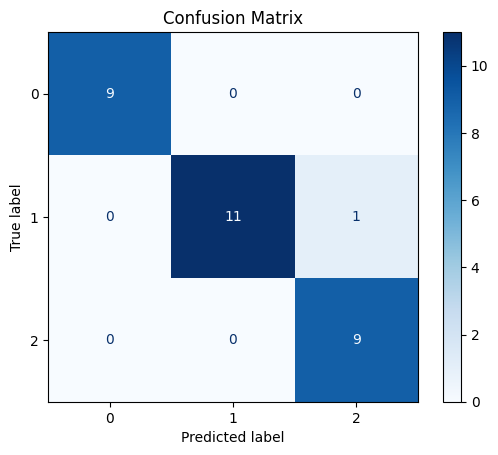

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Grid search CV

In [72]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 5, refit= True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [73]:
print(grid.best_params_)

{'n_neighbors': 3}


In [74]:
test_score = grid.score(X_test, y_test)
test_score

0.9666666666666667

Naive bayes


In [75]:

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [81]:
y_pred2 = model.predict(X_test)

In [82]:
y_pred_train2 = model.predict(X_train)

In [83]:
accuracy_of_train = accuracy_score(y_train,y_pred_train2)
accuracy_of_test = accuracy_score(y_test, y_pred2)

print(f'Accuracy of train: {accuracy_of_train}')
print(f'Accuracy of test: {accuracy_of_test}')

Accuracy of train: 0.95
Accuracy of test: 0.9333333333333333


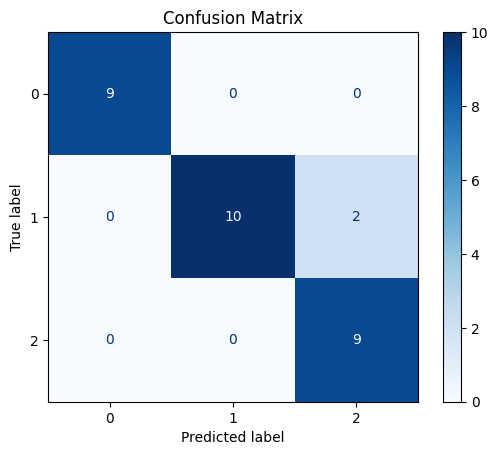

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()